## IAA Laboratori 4 - Linear Regression


In [42]:
%pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Loading libraries

# Basic libraries 
import pandas as pd
import numpy as np
from numpy.linalg import inv
from scipy import stats

# Data Visualization
import plotly.express as px
import plotly.graph_objs as go
import plotly.subplots as sp
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import plotly.io as pio
from IPython.display import display
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix
import seaborn as sns
%matplotlib inline

# Diabetes dataset
from sklearn.datasets import load_diabetes

# For splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split

# Metric for evaluation
from sklearn.metrics import mean_squared_error

# Statsmodels for Linear Regression
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Display images 
from IPython.display import Image

# Hiding warnings 
import warnings
warnings.filterwarnings("ignore")

# Introducing linear regression

Linear Regression is a statistical method widely used in various fields, including economics, biology, engineering, and many more for <mark><b>predictive modeling</b></mark> and <mark><b>hypothesis testing</b></mark>.</p>

It is based on modeling the <mark><b>relationship</b></mark> between and dependent variable and one or more independent variable by fitting a linear equation to the observed data. The primary objective of a linear regression is finding the <mark><b>best-fitting line</b></mark> that can accurately predict the output of the dependent variable given the values of the independent variable(s).</p>
The line is given by the following equation:


\begin{equation}
Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + \beta_3X_3 + \ldots + \epsilon
\end{equation}



Where:
$Y$ is the dependent variable.
$\beta_0$ is the intercept.

$\beta_1$, $\beta_2$, $\beta_3$, $\ldots$ are the coefficients for each independent variable.

$X_1$, $X_2$, $X_3$, $\ldots$ represent each one independent variable.
$\epsilon$ is the error term, which captures the <mark><b>random noise</b></mark> in the dependent variable. It is the <mark><b>stochastic</b></mark> component.
In this equation, each component serves a specific purpose. The $Intercept(\beta_0)$, for instance, is the <mark><b>constant term</b></mark> that represents the value of $Y$ (the dependent variable) when all the independent variables $X_1$, $X_2$, $\ldots$  are equal to <mark><b>zero</b></mark>. It locates the line up or down the y-axis on the <b>Cartesian coordinate system</b>, as you can see in the image below. When
\begin{equation}
X = 0, Y = \beta_0
\end{equation}
<center>
    <img src = "https://www.mathplanet.com/Oldsite/media/27468/coordinateplane06.png">
</center>

In the case of <mark><b>one single</b></mark> independent variable, the intercept is calculated as the following:

\begin{equation}
\beta_0 = \bar{Y} - \beta \bar{X}
\end{equation}

Where:
$\bar{Y}$ is the <mark><b>mean</b></mark> value of the dependent variable $Y$.
$\bar{X}$ is the <mark><b>mean</b></mark> value of the independent variable $X$.

The $Coefficients(\beta_1, \beta_2, \beta_3, \ldots)$ are the values that measure the <mark><b>magnitude of impact</b></mark> of each independent variable on the dependent variable. A one-unit change in $X_1$, for instance, will result in a $\beta_1$ change in $Y$ if all the other $X_s$ are <mark><b>constant</b></mark>.

The equation for finding the value of $\beta_1$ in a simple linear regression model with only <mark><b>one single</b></mark> independent variable is given by the following:

\begin{equation}
\beta_1 = \frac{\sum_{i=1}^{n} (X_i - \bar{X})(Y_i - \bar{Y})}{\sum_{i=1}^{n} (X_i - \bar{X})^2}
\end{equation}

Where:
$X_i$ and $Y_i$ represent the $i^{th}$ sample of both $X$ and $Y$.
>$\bar{X}$ and $\bar{Y}$ represent the mean values for both $X$ and $Y$.
$\sum_{i=1}^{n}$ represent the sum starting from the first element of the series up until the $n^{th}$ element of the series.
In this equation, the coefficient $\beta_1$ is the result of the ratio of the <mark><b>covariance</b></mark> between $X$ and $Y$, represented by the product of the deviations between each $X$ and $Y$ from their respective means, and the variance of $X$, given by the sum of the squares of the deviations of each $X$ from its mean. The effect of the independent variable on the dependent variable can be summed up as the following:
• $\beta_1$ $>$ 0:</b> $Y$ <mark>increases</mark> as $X$ <mark>increases</mark>.
• $\beta_1$ $<$ 0:</b> $Y$ <mark>decreases</mark> as $X$ <mark>increases</mark>.
• $\beta_1$ = 0:</b> $X$ has <mark>no effect</mark> on $Y$.
In the case of a linear regression with <mark><b>multiple</b></mark> independent variables, the coefficients and the intercept are obtained through <mark><b>matrix algebra</b></mark>:


\begin{equation}
\beta = (X^TX)^{-1}X^TY
\end{equation}
Where:
$\beta$ is a <mark><b>vector</b></mark> containing the intercept and coefficients.
$X$ is a <mark><b>matrix</b></mark> where the first column is all $1_s$ and the other columns each represent a different independent variable.
$X^T$ is the <mark><b>transpose</b></mark> of the $X$ matrix.
$(X^TX)^{-1}$ is the <mark><b>inverse</b></mark> of the product of the $X$ matrix and its transpose.
$Y$ is a <mark><b>vector</b></mark> of values of the dependent variable.
The goal of this operation is to obtain estimates of the parameters in the $\beta$ vector, which are the coefficients and the intercept.</p>
The linear regression with multiple independent variables can be then given by the following equation:

\begin{equation}
Y = X\beta + \epsilon
\end{equation}

The image below can correctly display the matrix form of the equation above.
<center>
    <img src = "https://miro.medium.com/v2/resize:fit:640/format:webp/1*S-ElAv4JjLSOqM2jDtUtlQ.png">
</center>

The first column of the $X$ matrix is populated by $1_s$ for the intercept, which is represented by the $\beta_1$ in the $\beta$ vector.

## Loading the Housing dataset into a data frame

As I understand, there are 2 problems in the data:

    Racism: There is a great article, which was also cited in the Scikit-Learn documentation by M. Carlisle. It focuses on the main issues of the Boston Housing dataset, which he found that house prices effected by neighbourhood race.
    No suitable goal: "the goal of the research that led to the creation of this dataset was to study the impact of air quality but it did not give adequate demonstration of the validity of this assumption."

### Some ethic comments

`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>

Attributes:
    
<pre>
1. CRIM      per capita crime rate by town
2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
3. INDUS     proportion of non-retail business acres per town
4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
5. NOX       nitric oxides concentration (parts per 10 million)
6. RM        average number of rooms per dwelling
7. AGE       proportion of owner-occupied units built prior to 1940
8. DIS       weighted distances to five Boston employment centres
9. RAD       index of accessibility to radial highways
10. TAX      full-value property-tax rate per $10,000
11. PTRATIO  pupil-teacher ratio by town
12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
13. LSTAT    % lower status of the population
14. MEDV     Median value of owner-occupied homes in $1000s
</pre>

In [3]:
import pandas as pd

df = pd.read_csv('../../data/housing.data.txt',
                 header=None,
                 sep='\s+')

df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
              'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


For a linear regression model to be considered significant and efficient, there are some <mark><b>key assumptions</b></mark> that need to be met. These are:</p>
$1.$ There must be a <mark>linear relationship</mark> between the independent variable and the dependent variable.</p>
$2.$ There should be little to no <mark>multicollinearity</mark> in the data. That is, the independent variables should not be too highly correlated with each other.</p>
$3.$ The observations should be <mark>independent</mark> of each other.</p>
$4.$ The residuals - errors between the predicted values and the true values - should be <mark>normally distributed</mark>.</p>
$5.$ The variance of residuals should be constant across all levels of the dependent variable, this is described as <mark>homoscedasticity</mark>.</p>
Failing to meet the assumptions listed above can have many implications, among them is having a model with <mark><b>poor predictive</b></mark> power, unstable coefficient estimates, inaccurate hypothesis tests, and biased errors.</p>

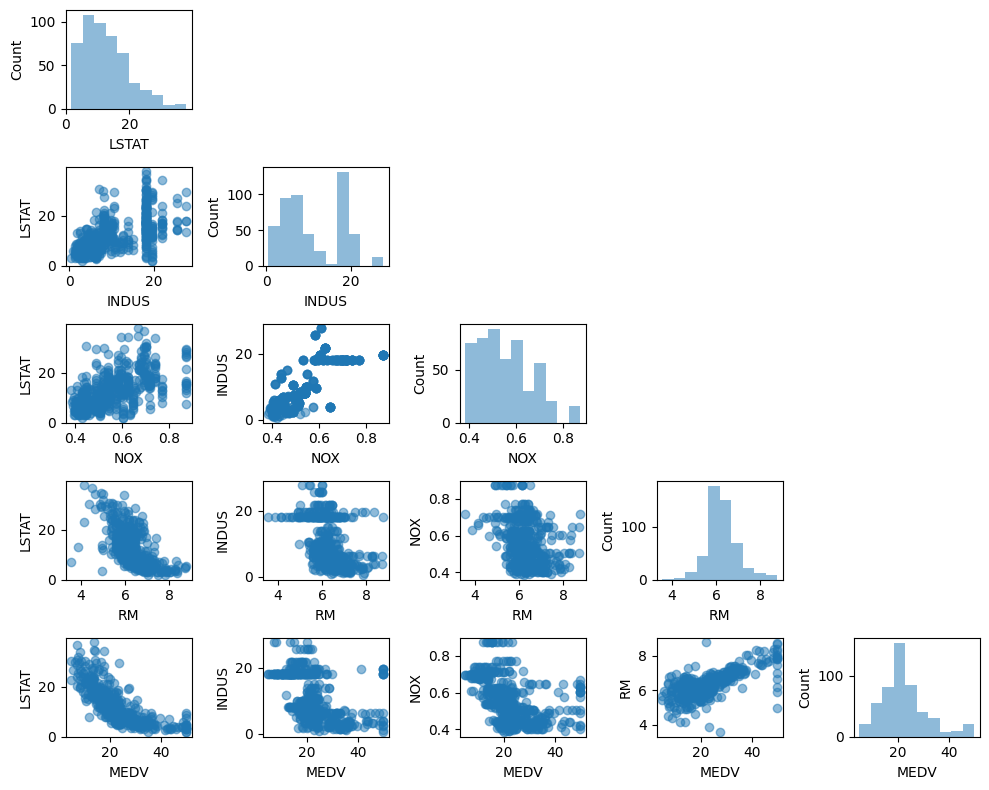

In [4]:
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']

scatterplotmatrix(df[cols].values, figsize=(10, 8), 
                  names=cols, alpha=0.5)
plt.tight_layout()
#plt.savefig('images/10_03.png', dpi=300)
plt.show()

<div class="alert alert-success">
PLAYTIME: Which features seem to have a linear relathionship? 
</div>


In [5]:
corr = np.round(df.corr(), 2) # Computing correlation
target_corr = corr.loc[['MEDV'], :].drop(columns=['MEDV']) # Filtering for the Target variable

# Creating annotated heatmap
fig = ff.create_annotated_heatmap(z=target_corr.values,
                                  x=target_corr.columns.tolist(),
                                  y=['MEDV'],
                                  colorscale='Magenta')

# Updating layout
fig.update_layout(title={'text': '<b>Correlation Between MEDV (Target) and Independent Variables</b>',
                        'x': 0.05, 'xanchor': 'left'},
                  margin=dict(t=210, l=110),
                  yaxis=dict(showgrid=False),
                  xaxis=dict(showgrid=False),
                  plot_bgcolor='#F6F5F5',
                  paper_bgcolor='#F6F5F5',
                  height=300, width=950) 

# Configuring font size 
for i in range(len(fig.layout.annotations)):
    fig.layout.annotations[i].font.size = 14

fig.show()

In [6]:
# Measuring correlations
corr = np.round(df.corr(), 2)
#corr = corr.drop('Target', axis=0).drop('Target', axis=1) # Removing target variable

# Filtering redundant values
mask = np.triu(np.ones_like(corr, dtype = bool))
c_mask = np.where(~mask, corr, 100)

c = []
for i in c_mask.tolist()[1:]:
    c.append([x for x in i if x != 100])

# Creating annotated heatmap
fig = ff.create_annotated_heatmap(z=c[::-1],
                                  x=corr.index.tolist()[:-1],
                                  y=corr.columns.tolist()[1:][::-1],
                                  colorscale = 'Magenta')

fig.update_layout(title = {'text': '<b>Correlation Among Independent Features</b>',
                           'x': 0.05, 'xanchor': 'left'},
                  margin = dict(t=210, l = 110),
                  yaxis = dict(autorange = 'reversed', showgrid = False),
                  xaxis = dict(showgrid = False),
                  plot_bgcolor = '#F6F5F5',
                  paper_bgcolor = '#F6F5F5',
                  height = 950, width = 950)
                     

fig.add_trace(go.Heatmap(z = c[::-1],
                         colorscale = 'Magenta',
                         showscale = True,
                         visible = False))
fig.data[1].visible = True
for i in range(len(fig.layout.annotations)):
    fig.layout.annotations[i].font.size = 12

fig.show()

<div class="alert alert-success">
PLAYTIME: Use the correlation plots to check for multicollinearity, to see if there is any strong correlation between the independent variables. 
</div>


# Implementing an Ordinary Least Squares (OLS) linear regression model

We are going to see the "magic" behind scikit-learn LinearRegression algorithm. We will use MEDV as the target variable and RM as the independent variable. We will see how to solve the find the parameter for a simple linear regression model with just one parameter by means of (1) an iterative algorithm named **Gradient Descent (GD)** and (2) by the deterministic **normal equations**.

## Solving regression for regression parameters with gradient descent

In [7]:
class LinearRegressionGD(object):

    def __init__(self, eta=0.001, n_iter=20):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return self.net_input(X)

<div class="alert alert-success">
PLAYTIME: Try to understand previous code and relate to the normal equations. How the parameters are updated? What is eta parameter? When the algortihm stops? Which is the loss function?
</div>

In [8]:
X = df[['RM']].values
y = df['MEDV'].values

In [9]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()

In [10]:
lr = LinearRegressionGD()
lr.fit(X_std, y_std)

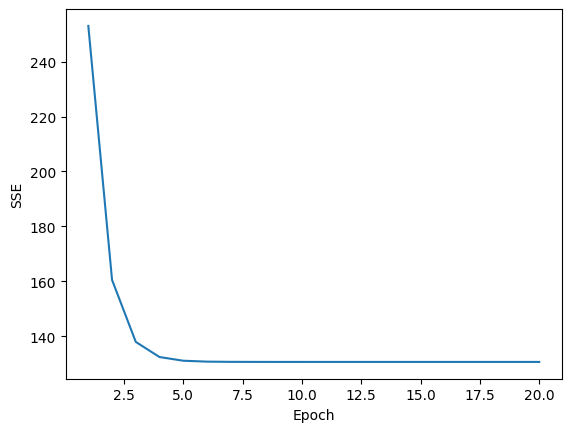

In [11]:
plt.plot(range(1, lr.n_iter+1), lr.cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')
#plt.tight_layout()
#plt.savefig('images/10_05.png', dpi=300)
plt.show()

<div class="alert alert-success">
PLAYTIME: Are 20 iterations necessary? Think on a method to stop previous algoritm (stopping criteria) to avoid unnecessary iterations.
</div>

In [12]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)    
    return 

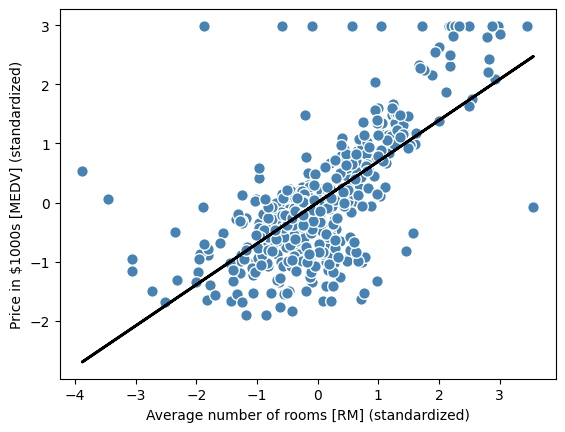

In [13]:
lin_regplot(X_std, y_std, lr)
plt.xlabel('Average number of rooms [RM] (standardized)')
plt.ylabel('Price in $1000s [MEDV] (standardized)')

#plt.savefig('images/10_06.png', dpi=300)
plt.show()

In [14]:
print('Slope: %.3f' % lr.w_[1])
print('Intercept: %.3f' % lr.w_[0])

Slope: 0.695
Intercept: -0.000


In [15]:
from distutils.version import LooseVersion
import sklearn


num_rooms_std = sc_x.transform(np.array([[5.0]]))
price_std = lr.predict(num_rooms_std)

if LooseVersion(sklearn.__version__) >= LooseVersion('0.23.0'):
    print("Price in $1000s: %.3f" % sc_y.inverse_transform(price_std[:, np.newaxis]).flatten())
else:
    print("Price in $1000s: %.3f" % sc_y.inverse_transform(price_std))

Price in $1000s: 10.840


## Estimating the coefficient of a regression model via scikit-learn

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
slr = LinearRegression()
slr.fit(X, y) # type: ignore
y_pred = slr.predict(X)
print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)

Slope: 9.102
Intercept: -34.671


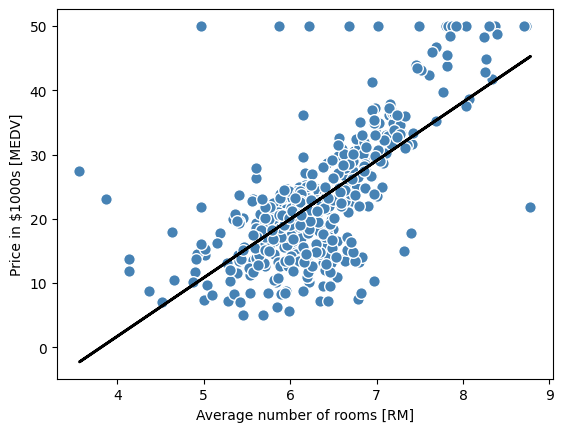

In [18]:
lin_regplot(X, y, slr)
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000s [MEDV]')

#plt.savefig('images/10_07.png', dpi=300)
plt.show()

<div class="alert alert-success">
PLAYTIME: Why do you think that the LinearRegression library does not have any parameter as input for estimating the regression?
</div>

**Normal Equations** alternative:

In [19]:
# adding a column vector of "ones"
Xb = np.hstack((np.ones((X.shape[0], 1)), X))
w = np.zeros(X.shape[1])
z = np.linalg.inv(np.dot(Xb.T, Xb))
w = np.dot(z, np.dot(Xb.T, y))

print('Slope: %.3f' % w[1])
print('Intercept: %.3f' % w[0])

Slope: 9.102
Intercept: -34.671


# Evaluating the performance of linear regression models

In [20]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1].values
y = df['MEDV'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

In [21]:
slr = LinearRegression()

slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

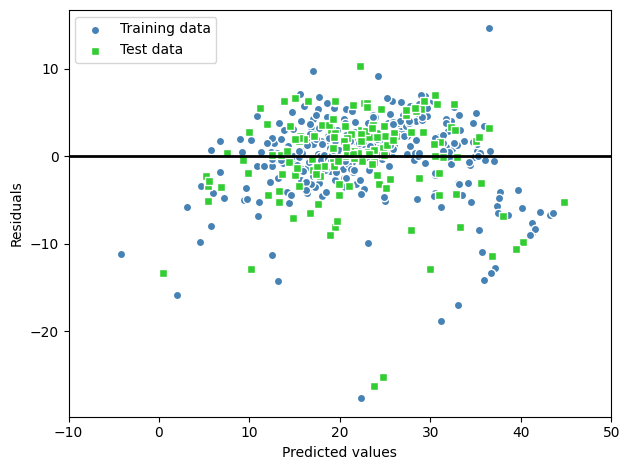

In [22]:
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.tight_layout()

# plt.savefig('images/10_09.png', dpi=300)
plt.show()

In [23]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 19.958, test: 27.196
R^2 train: 0.765, test: 0.673


# Estimating the coefficients of a regression model via statsmodels

Once we have seen the magic, in fact, for the modeling step, we are going to use <code>statsmodel.OLS</code> to fit the linear regression model to the training data. This will also allow us to print a summary describing key metrics for a better understanding on how well the model fits the data.

I am also going to use a testing set to predict the values for the dependent variable, and use the <b><i>Root Mean Squared Error</i></b> to evaluate performance. The RMSE is given by the following formula:

\begin{equation}
\text{RMSE} = \sqrt{\frac{\sum_{i=1}^{n} (Y_i - \hat{Y}_i)^2}{n}}
\end{equation}
Where:</p>

$Y_i$ is the true value for $Y$ in the $i^{th}$ sample.
$\hat{Y}_i$ is the predicted value for $Y$ in the $i^{th}$ sample.
The RMSE is simply the square root of the average of the squared differences between the actual and predicted values. It is expressed in the same units as the target variable, making it very intuitive to comprehend. The closer to 0, the most accurate are the predictions.

In [24]:
data=df

In [25]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1]
y = df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

We are also going to add a constant to the $X$ dataframes. This is basically the first column of $1_s$ we have seen before, used for the intercept, which is the $\beta_1$ in the $\beta$ vector.

In [26]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
141,1.62864,0.0,21.89,0,0.624,5.019,100.0,1.4394,4,437.0,21.2,396.90,34.41
272,0.11460,20.0,6.96,0,0.464,6.538,58.7,3.9175,3,223.0,18.6,394.96,7.73
135,0.55778,0.0,21.89,0,0.624,6.335,98.2,2.1107,4,437.0,21.2,394.67,16.96
298,0.06466,70.0,2.24,0,0.400,6.345,20.1,7.8278,5,358.0,14.8,368.24,4.97
122,0.09299,0.0,25.65,0,0.581,5.961,92.9,2.0869,2,188.0,19.1,378.09,17.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,0.28392,0.0,7.38,0,0.493,5.708,74.3,4.7211,5,287.0,19.6,391.13,11.74
192,0.08664,45.0,3.44,0,0.437,7.178,26.3,6.4798,5,398.0,15.2,390.49,2.87
117,0.15098,0.0,10.01,0,0.547,6.021,82.6,2.7474,6,432.0,17.8,394.51,10.30
47,0.22927,0.0,6.91,0,0.448,6.030,85.5,5.6894,3,233.0,17.9,392.74,18.80


LSTAT: Proportion of population that is lower status = 1/2 * (proportion of adults without some high school education and proportion of male workers classified as laborers). (1970 US Census)

Some ethics notes again https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8

<Axes: xlabel='RM', ylabel='MEDV'>

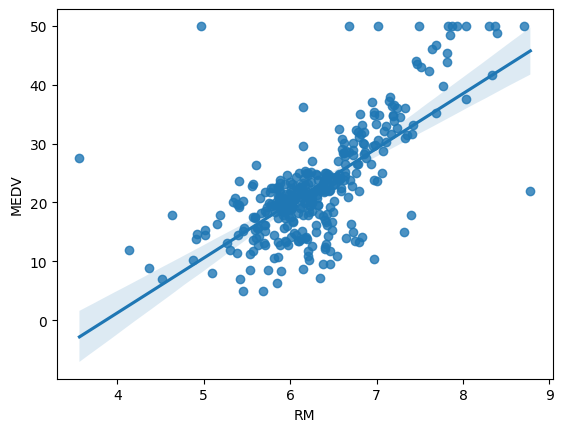

In [27]:
#sns.regplot(x=data['LSTAT'],y=data['MEDV'])
sns.regplot(x=X_train['RM'],y=y_train)


## Simple Linear Regression

In [28]:
data = X_train
data['MEDV'] = y_train
model = smf.ols('MEDV ~ RM',data = data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     355.8
Date:                Sun, 15 Oct 2023   Prob (F-statistic):           2.45e-55
Time:                        22:22:11   Log-Likelihood:                -1164.5
No. Observations:                 354   AIC:                             2333.
Df Residuals:                     352   BIC:                             2341.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -35.9943      3.133    -11.487      0.0

In [29]:
residuals = model.resid # Obtaining residuals

# Creating a distribution plot
fig = ff.create_distplot([residuals], ['Residuals'], bin_size=2)
fig.update_layout(title={'text': '<b>Distribution Plot of Residuals</b>',
                         'x': 0.05, 'xanchor': 'left'},
                  plot_bgcolor='#F6F5F5',
                  paper_bgcolor='#F6F5F5',
                  height=750, width=950,
                  showlegend=False)

fig.show()

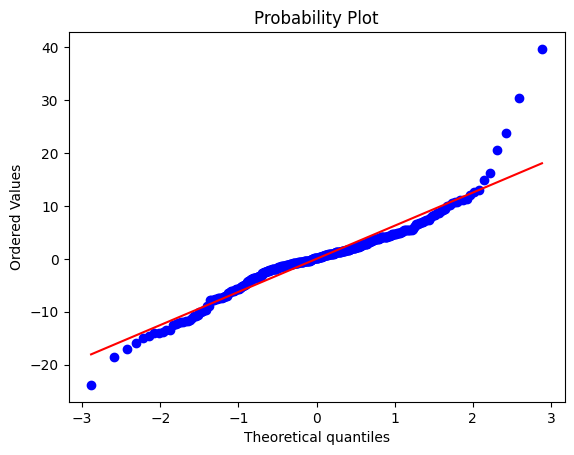

In [30]:
# Q-Q plot
ax = stats.probplot(model.resid, dist='norm', plot=plt)

# Multiple Regression

In [31]:
string_cols = ' + '.join(data.columns[:-1])
est = smf.ols('MEDV ~ {}'.format(string_cols),data = data).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     84.92
Date:                Sun, 15 Oct 2023   Prob (F-statistic):           2.76e-98
Time:                        22:22:12   Log-Likelihood:                -1032.2
No. Observations:                 354   AIC:                             2092.
Df Residuals:                     340   BIC:                             2147.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     37.9371      5.876      6.457      0.0

There are many insights that can be extracted from the summary above. Let's start by observing the features and their coefficients.
Remember the linear regression equation:

\begin{equation}
Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + \ldots + \epsilon
\end{equation}

The $Intercept(\beta_0)$ is equal to 37.9371. It means that the predicted value of $Y$ will be <mark>37.9371</mark> when <u>all the other features are equal to 0</u>.

The $\beta_1$ coefficient is the average change in $Y$ for a one-unit change in $X_6$, which is the <code>RM</code> variable. In this case, a one-unit increase in <code>RM</code> is going to represent an increase of about <mark>3.8591</mark> in the predicted value for $Y$ <u>when all other features are constant</u>.

We can also see negative coefficients, which is the case of the coefficient of <code>NOX</code>. This suggests that for one-unit increase in this feature we may expect a decrease of about <mark>16.2313</mark> in the predicted value of $Y$, as long as all other features are held constant.

We also have in the summary the standard errors $std$ $err$ values. When looking at this metric, we want values to be as low as possible, indicating a more reliable estimate for coefficient values. The $P>|t|$ tells us if the feature is statistically significant or not. We want these values to be <mark><b>below $0.05$</b></mark> to deem a feature statistically significant for predicting the outcome of $Y$.


<div class="alert alert-success">
PLAYTIME: Which are the most reliable independent variables? 
</div>

We also have other important metrics to look at. The R-Squared metric at 0.765 suggests that me model is able to explain approximately $76.5$% of the variance in the target variable.

The <b><i>Durbin-Watson</i></b> statistic is used to detect autocorrelation between the residuals. Values for the $DW$ range between 0 to 4 and, as a rule of thumb, values between 1.5 to 2.5 suggest that there is no autocorrelation between the residuals and our samples are independent of each other. Considering our $DW$ value is equal to 2.019, this ticks one of the key assumptions of Linear Regression.

Another relevant metric is the <b><i>Jarque-Bera</i></b> statistic, which tells us whether the residuals are normally-distributed or not. As a rule of thumb, if $JB$ is too far from zero, it indicates that the data is <mark>not-normally distributed</mark>. In this case, a $JB$ equal to 634.086 suggests that our residuals may be normally distributed. The values for the Kurtosis, around to 9.0, and Skew, close to 1, are also relevant metrics to suggest our residuals are indeed normally distributed. This is another positive sign when talking about the assumptions regarding Linear Regression models.

To confirm if the residuals are normally-distributed or not, we can use a Histogram plot to visualize how they're distributed.

In [32]:
y_pred = model.predict(X_test) # Running predictions
rmse = mean_squared_error(y_test, y_pred,squared = False) # Computing RMSE

print(f'\nRoot Mean Squared Error for Baseline Model: {rmse:.2f}')


Root Mean Squared Error for Baseline Model: 6.86


The RMSE shows us that, on average, our model is getting the value of $Y$ wrong by 6.86 units.
          
We can also plot a scatter plot between actual and predicted values to visualize how they relate to each other.

In [33]:
plot_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) # Creating Dataframe containing actual and predicted values

fig = px.scatter(plot_df, x='Actual', y='Predicted', opacity=0.825, template='seaborn') # Creating scatterplot
fig.add_traces(px.scatter(plot_df, x='Actual', y='Predicted', trendline="ols").data[1]) # Obtaining the fit line

fig.update_traces(marker={'size': 8})

fig.update_layout(title={'text': f'<b>Scatter Plot Between Actual and Predicted Values <br> <sub>First Model using all independent variables</sub></b>',
                         'x': 0.05, 'xanchor': 'left', 'y': 0.968},
                  showlegend=True,
                  plot_bgcolor='#F6F5F5',
                  paper_bgcolor='#F6F5F5',
                  height=650, width=850)
             

<div class="alert alert-success">
PLAYTIME: Plot the residual distribution for previous model. It resembles a bell curve? are residuals normaly distributed also in this case? Compute the RMSE for the single independent variable model that uses only the RM independent variable. It improves to use all the features as independent variable? which model is more reliable for unseen data?
</div>

In [34]:
#removing AGE and INDUS
string_cols = ' + '.join(data.columns[:-1].difference(['AGE','INDUS']))
model = smf.ols('MEDV ~ {}'.format(string_cols),data = data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     100.8
Date:                Sun, 15 Oct 2023   Prob (F-statistic):          3.40e-100
Time:                        22:22:12   Log-Likelihood:                -1032.4
No. Observations:                 354   AIC:                             2089.
Df Residuals:                     342   BIC:                             2135.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     38.1890      5.824      6.557      0.0

In [35]:
y_pred = model.predict(X_test) # Running predictions
rmse = mean_squared_error(y_test, y_pred,squared = False) # Computing RMSE

print(f'\nRoot Mean Squared Error for Baseline Model: {rmse:.2f}')


Root Mean Squared Error for Baseline Model: 5.20


This model achieves a better RMSE score, by scoring a value lower than the previous model. We can also plot the scatter plot between actual and predicted values.

In [36]:
plot_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) # Creating Dataframe containing actual and predicted values

fig = px.scatter(plot_df, x='Actual', y='Predicted', opacity=0.825, template='seaborn') # Creating scatterplot
fig.add_traces(px.scatter(plot_df, x='Actual', y='Predicted', trendline="ols").data[1]) # Obtaining the fit line

fig.update_traces(marker={'size': 8})

fig.update_layout(title={'text': f'<b>Scatter Plot Between Actual and Predicted Values <br> <sub>Second Model droping AGE and INDUS independent variables</sub></b>',
                         'x': 0.05, 'xanchor': 'left', 'y': 0.968},
                  showlegend=True,
                  plot_bgcolor='#F6F5F5',
                  paper_bgcolor='#F6F5F5',
                  height=650, width=850)

<div class="alert alert-success">
PLAYTIME: Build a model with the most reliable independent variables. Compare the values of RMSE, R-squared and F-stat. It is a best model for predicting values of the target variable?
</div>

#  EXTRA track: Interaction term

In [37]:
est = smf.ols('MEDV ~ LSTAT*AGE',data = data).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     148.2
Date:                Sun, 15 Oct 2023   Prob (F-statistic):           5.41e-62
Time:                        22:22:12   Log-Likelihood:                -1143.0
No. Observations:                 354   AIC:                             2294.
Df Residuals:                     350   BIC:                             2310.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     35.1156      1.709     20.543      0.0

In [38]:
#adding power term
tmp = data.copy()
tmp['LSTAT_2'] = tmp['LSTAT']**2
est = smf.ols('MEDV ~ LSTAT + LSTAT_2',data = tmp).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     337.5
Date:                Sun, 15 Oct 2023   Prob (F-statistic):           1.78e-82
Time:                        22:22:12   Log-Likelihood:                -1098.3
No. Observations:                 354   AIC:                             2203.
Df Residuals:                     351   BIC:                             2214.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     43.3195      1.006     43.073      0.0

In [39]:
#adding power term
tmp = data.copy()
tmp['LSTAT_2'] = tmp['LSTAT']**2
est = smf.ols('MEDV ~  LSTAT + LSTAT_2 + RM',data = tmp).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     312.3
Date:                Sun, 15 Oct 2023   Prob (F-statistic):           1.42e-98
Time:                        22:22:12   Log-Likelihood:                -1057.7
No. Observations:                 354   AIC:                             2123.
Df Residuals:                     350   BIC:                             2139.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.2572      3.594      2.854      0.0

# Loading the diabetes and playing with it

In [40]:
# Loading dataset
X, y = load_diabetes(return_X_y=True)

In [41]:
# Creating a DataFrame for the Independent variables
X_df = pd.DataFrame(X, columns = [f'Feature_{i+1}' for i in range(X.shape[1])])
X_df

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [116]:
# Creating a DataFrame for the Dependent variable
y_df = pd.DataFrame(y, columns = ['Target'])
y_df

,Target
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0
...,...
437,178.0
438,104.0
439,132.0
440,220.0


<div class="alert alert-success">
PLAYTIME: Let's study the diabetes dataset. Look for correlations among independent variables and create a similar study for the target variable as the one from the Housing dataset
</div>

## 📚 Further Reading...

During the analyses of the different models. I am leaving below a number of sources where you can read more about them.
          
- <b>F-Statistic:</b>
    
    - <a href = "https://www.statisticshowto.com/probability-and-statistics/f-statistic-value-test/">F Statistic / F Value: Simple Definition and Interpretation</a>
    - <a href = "https://www.statology.org/a-simple-guide-to-understanding-the-f-test-of-overall-significance-in-regression/">A Simple Guide to Understanding the F-Test of Overall Significance in Regression</a>

<br>

- <b>Log-Likelihood:</b>
    
    - <a href = "https://www.statisticshowto.com/log-likelihood-function/">Log Likelihood Function</a>
    - <a href = "https://www.statology.org/interpret-log-likelihood/">How to Interpret Log-Likelihood Values (With Examples)</a>

<br>

    
- <b>Durbin Watson Test:</b>
    
    - <a href = "https://www.investopedia.com/terms/d/durbin-watson-statistic.asp">Durbin Watson Test: What It Is in Statistics, With Examples</a>
    - <a href = "https://medium.com/@analyttica/durbin-watson-test-fde429f79203">Understanding Durbin-Watson Test</a>

<br>

- <b>Jarque-Bera Test:</b></p>
    
    - <a href = "https://www.statisticshowto.com/jarque-bera-test/">Jarque-Bera Test</a>
    - <a href = "https://en.wikipedia.org/wiki/Jarque%E2%80%93Bera_test">Wikipedia: Jarque–Bera test</a>
    
<br>

- <b>AIC (Akaike Information Criterion):</b></p>
    
    - <a href = "https://www.statisticshowto.com/akaikes-information-criterion/">Akaike’s Information Criterion: Definition, Formulas</a></p>
    
<br>
    
- <b>BIC (Bayesian Information Criterion):</b></p>
    
    - <a href = "https://www.statisticshowto.com/bayesian-information-criterion/">Bayesian Information Criterion (BIC) / Schwarz Criterion</a></p>
    
<br>
    
- <b>R-Squared:</b></p>
    
    - <a href = "https://www.statisticshowto.com/probability-and-statistics/coefficient-of-determination-r-squared/">Coefficient of Determination (R Squared): Definition, Calculation
        </a></p>

<br><br><br>

<p style="font-size: 20px;
          font-family: Monaco">
    <i>Stay curious!</i></p>